In [1]:
#|default_expv app

In [2]:
import numpy as np

In [4]:
from fastai.vision.all import *

In [5]:
#|export
from fastai.learner import load_learner
from PIL import Image
import gradio as gr

def is_cat(x): return x[0].isupper() 

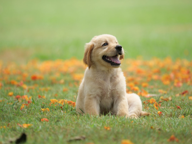

In [6]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [7]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [8]:
#|export
learn = load_learner('model.pkl')

In [9]:
learn.predict(im)

('False', TensorBase(0), TensorBase([1.0000e+00, 6.5653e-07]))

In [10]:
#|export
categories = ('Dog','Cat')

def classify_images(img):
  pred,idx,probs = learn.predict(img)
  return dict(zip(categories, map(float,probs)))

In [11]:
classify_images(im)

{'Dog': 0.9999992847442627, 'Cat': 6.56530687592749e-07}

In [12]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()

intf = gr.Interface(fn=classify_images, inputs=image, outputs=label)
intf.launch(inline=False)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x17aa0f706d0>, 'http://127.0.0.1:7860/', None)

In [13]:
m = learn.model

In [14]:
ps = list(m.parameters())

In [15]:
ps[1]

Parameter containing:
tensor([ 2.3354e-01,  2.6572e-01, -5.1096e-08,  5.1890e-01,  3.4404e-09,
         2.2505e-01,  4.2238e-01,  1.3153e-07,  2.5062e-01,  1.5152e-06,
         3.1717e-01,  2.5101e-01,  3.7763e-01,  1.0862e-05,  2.7484e-01,
         2.3678e-01,  2.4192e-01,  3.9597e-01,  4.7087e-01,  2.9040e-01,
         2.7101e-01,  2.7815e-01,  2.9033e-01,  2.0787e-01,  2.5954e-01,
         2.7993e-01,  2.9236e-01,  3.1566e-01,  3.8785e-01,  3.0191e-01,
         2.6638e-01,  2.1039e-01,  2.8616e-01,  3.3030e-01,  4.2668e-01,
         3.7317e-01,  7.4804e-08,  1.9048e-01,  1.4740e-08,  2.2501e-01,
         1.8082e-01,  2.4883e-01,  2.7247e-01,  2.5912e-01,  2.9463e-01,
         2.9890e-01,  2.2480e-01,  2.6406e-01,  2.2001e-08,  2.6558e-01,
         2.2037e-01,  2.8304e-01,  3.2963e-01,  2.2843e-01,  3.6554e-01,
         2.1269e-01,  2.3919e-01,  2.5082e-01,  5.2501e-01,  2.4820e-01,
         2.9392e-01,  2.5831e-01,  4.8124e-01,  2.6435e-01],
       requires_grad=True)

In [16]:
ps[0].shape

torch.Size([64, 3, 7, 7])

In [17]:
ps[0]

Parameter containing:
tensor([[[[-1.0419e-02, -6.1233e-03, -1.7957e-03,  ...,  5.6619e-02,
            1.7078e-02, -1.2734e-02],
          [ 1.1107e-02,  9.5548e-03, -1.0989e-01,  ..., -2.7122e-01,
           -1.2908e-01,  3.7064e-03],
          [-6.9059e-03,  5.9133e-02,  2.9550e-01,  ...,  5.1973e-01,
            2.5632e-01,  6.3553e-02],
          ...,
          [-2.7453e-02,  1.6112e-02,  7.2638e-02,  ..., -3.3281e-01,
           -4.2054e-01, -2.5779e-01],
          [ 3.0708e-02,  4.1032e-02,  6.2888e-02,  ...,  4.1387e-01,
            3.9363e-01,  1.6608e-01],
          [-1.3648e-02, -3.6169e-03, -2.4055e-02,  ..., -1.5067e-01,
           -8.2194e-02, -5.7691e-03]],

         [[-1.1448e-02, -2.6665e-02, -3.4693e-02,  ...,  3.2455e-02,
            5.9281e-04, -2.5829e-02],
          [ 4.5664e-02,  3.3567e-02, -1.0457e-01,  ..., -3.1259e-01,
           -1.6059e-01, -1.3744e-03],
          [-8.4796e-04,  9.8390e-02,  4.0204e-01,  ...,  7.0783e-01,
            3.6879e-01,  1.2448e-01]